In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset_path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/auto-mpg/auto-mpg.csv'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, na_values = "?")
dataset = raw_dataset.copy()
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [3]:
dataset = dataset.dropna()

In [4]:
dataset.pop('car name')
origin = dataset.pop('origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,1.0,0.0,0.0


In [5]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,1.0,0.0,0.0


In [6]:
import os

def save(path, X, Y):
    if not os.path.exists(path):
        os.makedirs(path)

    np.savetxt(path + 'X.csv', X)
    np.savetxt(path + 'Y.csv', Y)

In [7]:
X = dataset.iloc[:, 1:].to_numpy()
Y = dataset.iloc[:, 0].to_numpy()

path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/auto-mpg/data/'
save(path, X, Y)

path = '/home/amanda/Dropbox/trabalho/codigos/propostas/EVeP/data/auto-mpg/'
save(path, X, Y)

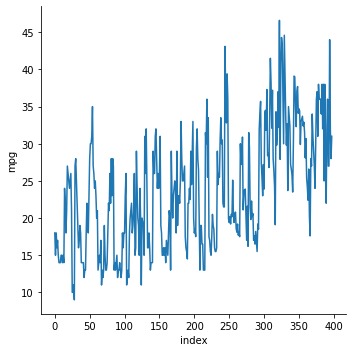

In [8]:
sns.relplot(x='index', y='mpg', kind='line', data=dataset.reset_index())

In [9]:
train_dataset = dataset.sample(n=196,random_state=10)
test_dataset = dataset.drop(train_dataset.index)

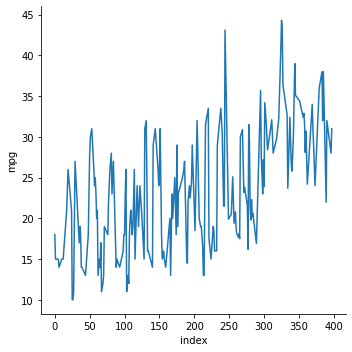

In [10]:
sns.relplot(x='index', y='mpg', kind='line', data=train_dataset.reset_index())

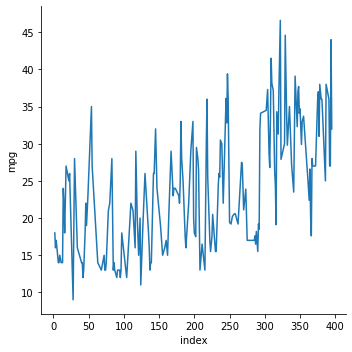

In [11]:
sns.relplot(x='index', y='mpg', kind='line', data=test_dataset.reset_index())

In [12]:
train_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
243,21.5,3,80.0,110.0,2720,13.5,77,0.0,0.0,1.0
371,29.0,4,135.0,84.0,2525,16.0,82,1.0,0.0,0.0
300,23.9,8,260.0,90.0,3420,22.2,79,1.0,0.0,0.0
345,35.1,4,81.0,60.0,1760,16.1,81,0.0,0.0,1.0
265,17.5,8,318.0,140.0,4080,13.7,78,1.0,0.0,0.0


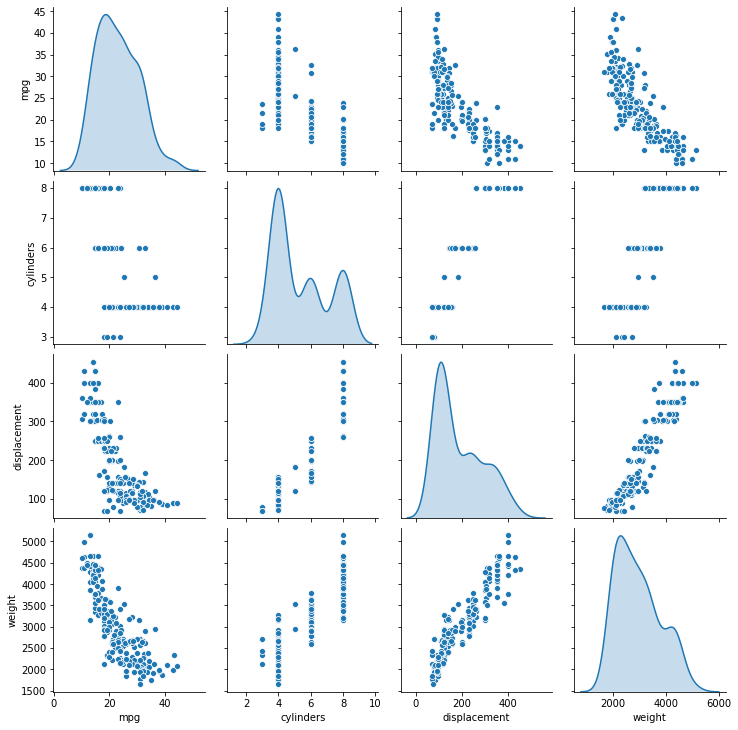

In [13]:
sns.pairplot(train_dataset[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [14]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mpg,196.0,23.110204,7.328329,10.0,17.925,22.4,28.550,44.3
cylinders,196.0,5.397959,1.693062,3.0,4.000,4.0,6.000,8.0
displacement,196.0,190.568878,102.499702,70.0,98.000,144.5,258.000,454.0
horsepower,196.0,103.005102,37.023970,46.0,76.750,90.0,120.000,220.0
weight,196.0,2967.239796,826.722605,1649.0,2252.000,2815.0,3509.250,5140.0
acceleration,196.0,15.805612,2.770785,9.0,14.000,15.5,17.225,24.8
model year,196.0,75.770408,3.601046,70.0,73.000,76.0,79.000,82.0
USA,196.0,0.617347,0.487279,0.0,0.000,1.0,1.000,1.0
Europe,196.0,0.198980,0.400255,0.0,0.000,0.0,0.000,1.0
Japan,196.0,0.183673,0.388209,0.0,0.000,0.0,0.000,1.0


In [13]:
def scale(x):
  return (x - train_stats['min']) / (train_stats['max'] - train_stats['min'])
scaled_train_data = scale(train_dataset)
scaled_test_data = scale(test_dataset)

In [14]:
scaled_train_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
373,0.408163,0.2,0.182292,0.264368,0.348324,0.468354,1.000000
108,0.291545,0.2,0.070312,0.241379,0.180464,0.632911,0.250000
64,0.145773,1.0,0.645833,0.597701,0.712117,0.284810,0.166667
131,0.641399,0.2,0.002604,0.109195,0.053566,0.759494,0.333333
333,0.661808,0.6,0.255208,0.494253,0.361215,0.151899,0.833333


In [15]:
train_labels = scaled_train_data.pop('mpg')
test_labels = scaled_test_data.pop('mpg')

In [16]:
path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/auto-mpg/data/'
np.savetxt(path + 'X_train.csv', scaled_train_data)
np.savetxt(path + 'X_test.csv', scaled_test_data)
np.savetxt(path + 'Y_train.csv', train_labels)
np.savetxt(path + 'Y_test.csv', test_labels)